# Link Budget Calculations

In [ ]:
import numpy as np
from rfmodel.core import load_yaml
from rfmodel.core import db_to_linear, dbm_to_w, w_to_dbm
import matplotlib.pyplot as plt
from rfmodel.system import (
    eirp,
    friis_received_power,
    free_space_path_loss_db,
    link_budget_pr_dbm,
    impedance_mismatch_loss_db,
    link_margin_db,
)

### Defining Variables

In [3]:
paper_parameters = load_yaml("configs/paper_anchors.yaml")
antenna_parameters = load_yaml("configs/antenna_params.yaml")

### Computing Link Budget

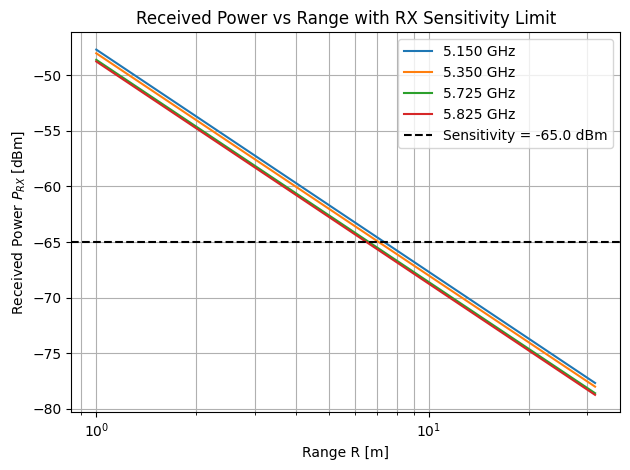

In [28]:
import numpy as np
import matplotlib.pyplot as plt

c = 299_792_458.0  # speed of light [m/s]

# Range sweep
R = np.logspace(0, 1.5, 300)  # 1 m → ~32 m

# Band edges → individual frequencies
bands_ghz = paper_parameters["anchors"]["rx"]["bands_ghz"]
freqs_ghz = [f for band in bands_ghz for f in band]
wavelengths = [c / (f * 1e9) for f in freqs_ghz]

# Minimum RX sensitivity
pr_min_dbm = paper_parameters["requirements"]["rx"]["sensitivity_dbm_mcs54_required"]

plt.figure()

for f_ghz, lam in zip(freqs_ghz, wavelengths):
    pr_dbm = link_budget_pr_dbm(
        pt_dbm=paper_parameters["anchors"]["tx"]["evm_db_mcs54"]["pout_dbm"],
        gt_db=antenna_parameters["specs"]["gain_db"],
        gr_db=antenna_parameters["specs"]["gain_db"],
        lt_db=0.0,
        lr_db=0.0,
        l0_db=free_space_path_loss_db(range_m=R, wavelength_m=lam),
        la_db=0.0
    )

    # Plot Pr(R)
    plt.plot(R, pr_dbm, label=f"{f_ghz:.3f} GHz")

    # Find where Pr crosses sensitivity
    idx = np.argmin(np.abs(pr_dbm - pr_min_dbm))
    R_hit = R[idx]


# Sensitivity line
plt.axhline(
    pr_min_dbm,
    color="k",
    linestyle="--",
    linewidth=1.5,
    label=f"Sensitivity = {pr_min_dbm:.1f} dBm"
)

plt.xscale("log")
plt.xlabel("Range R [m]")
plt.ylabel("Received Power $P_{RX}$ [dBm]")
plt.title("Received Power vs Range with RX Sensitivity Limit")
plt.grid(True, which="both")
plt.legend()
plt.tight_layout()
plt.show()


## Extracting Receiver SNR  and estimate EVM

In [ ]:
Rx_gain_max = paper_parameters["anchors"]["rx"]["gain_db"]["max"] # dB
Rx_NF = paper_parameters["anchors"]["rx"]["nf_db"] # dB
Rx_ip1dB = paper_parameters["anchors"]["rx"]["p1db_dbm_min_gain"] # dBm


[[5.15, 5.35], [5.725, 5.825]]